<a href="https://colab.research.google.com/github/Naima-ai/Sales_Dashboard/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Sales Data.csv to Sales Data.csv


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [24]:
sales_df=pd.read_csv('Sales Data.csv')

In [9]:
sales_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [11]:
sales_df.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


# Data Preparation

In [30]:
clean_df=wrangle(sales_df)

In [29]:
def wrangle(df):
  df=df.drop(['Unnamed: 0','Order ID'],axis=1)
  #rename sales to revenue
  df=df.rename(columns={'Sales':'Revenue'})
  #convert date into datetime and split into date and time
  df['Order Date']=pd.to_datetime(df['Order Date'])
  df['Date']=df['Order Date'].dt.date
  df['Time']=df['Order Date'].dt.time
  df['Year']=df['Order Date'].dt.year
  #map months to month names
  df['Month Name'] = pd.to_datetime(df['Month'], format='%m').dt.month_name()
  #map date to find the week days
  df['Day']=df['Order Date'].dt.day_name()
  return df


In [31]:
clean_df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hour,Date,Time,Year,Month Name,Day
0,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30,00:01:00,2019,December,Monday
1,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29,07:03:00,2019,December,Sunday
2,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12,18:21:00,2019,December,Thursday
3,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22,15:13:00,2019,December,Sunday
4,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18,12:38:00,2019,December,Wednesday


In [57]:
clean_df['Year'].value_counts()

,count
Year,
2019,185916
2020,34


 The file consists data of two years.

# Data Visualization

In [62]:
#showing the top 10 products of each year
top_products=clean_df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)

In [63]:
top_products

,Revenue
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56


In [87]:
#showing the top 5 products of each year
top_ordered_products=clean_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)

In [88]:
top_ordered_products

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557


In [64]:
#low selling products
low_products=clean_df.groupby('Product')['Revenue'].sum().sort_values(ascending=True).head(5)

In [65]:
low_products

,Revenue
Product,
AAA Batteries (4-pack),92740.83
AA Batteries (4-pack),106118.40
Wired Headphones,246478.43
USB-C Charging Cable,286501.25
Lightning Charging Cable,347094.15


In [66]:
#top 5 cities generating high revenues
top_cities=clean_df.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(5)

In [67]:
top_cities

,Revenue
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58


In [68]:
#low-selling 5 cities generating low revenues
low_cities=clean_df.groupby('City')['Revenue'].sum().sort_values(ascending=True).head(5)

In [69]:
low_cities

,Revenue
City,
Austin,1819581.75
Portland,2320490.61
Seattle,2747755.48
Dallas,2767975.40
Atlanta,2795498.58


In [74]:
#yearly comparison between sales
yearly_sales = clean_df.groupby('Year')['Revenue'].sum()

In [72]:
# Monthly sales trends
monthly_sales = clean_df.groupby('Month Name')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

In [78]:
monthly_sales

,Revenue
Month Name,
January,1822256.73
February,2202022.42
March,2807100.38
April,3390670.24
May,3152606.75
June,2577802.26
July,2647775.76
August,2244467.88
September,2097560.13


In [73]:
# Weekday sales
weekday_sales = clean_df.groupby('Day')['Revenue'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])


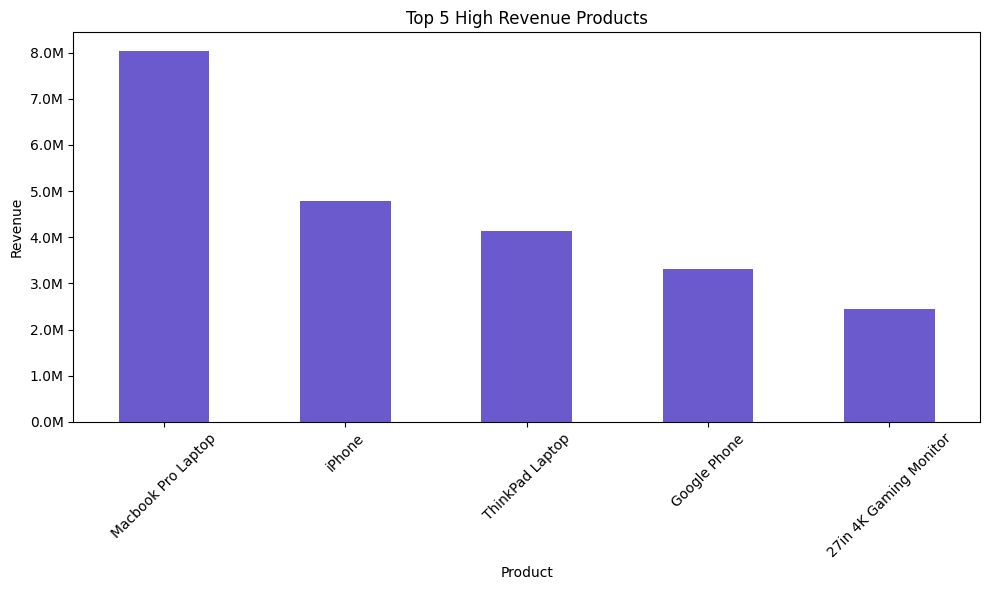

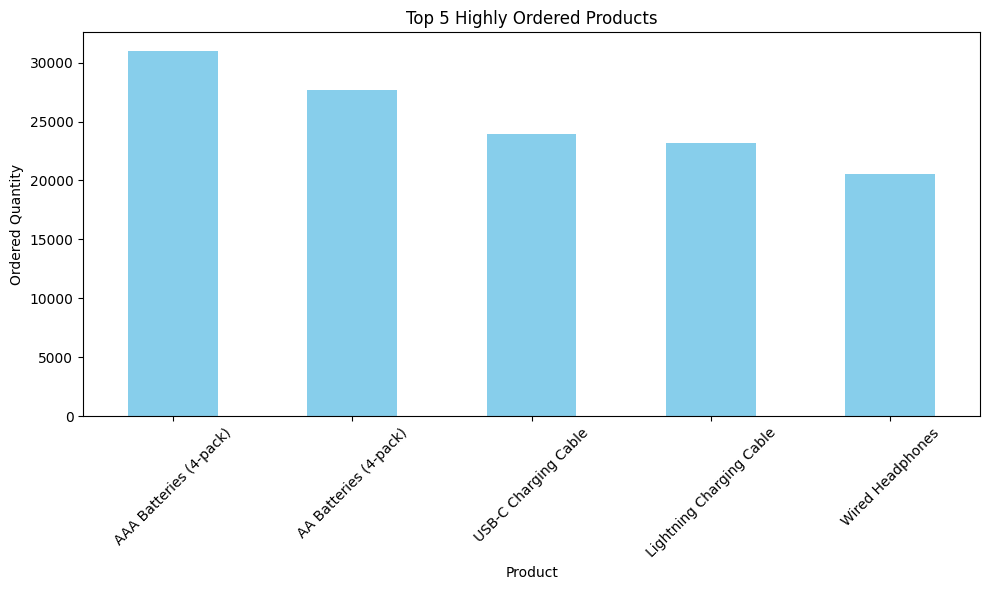

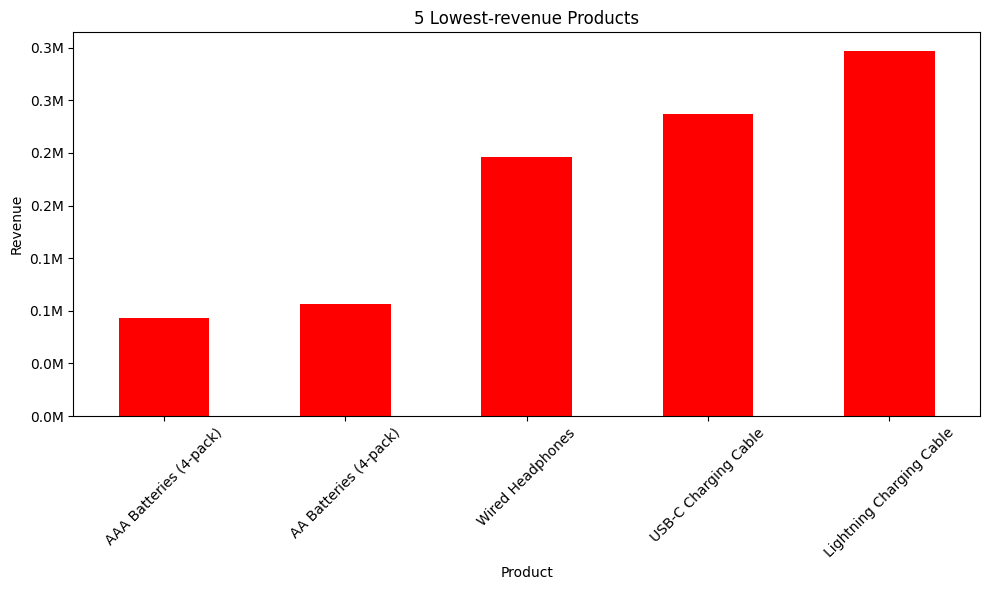

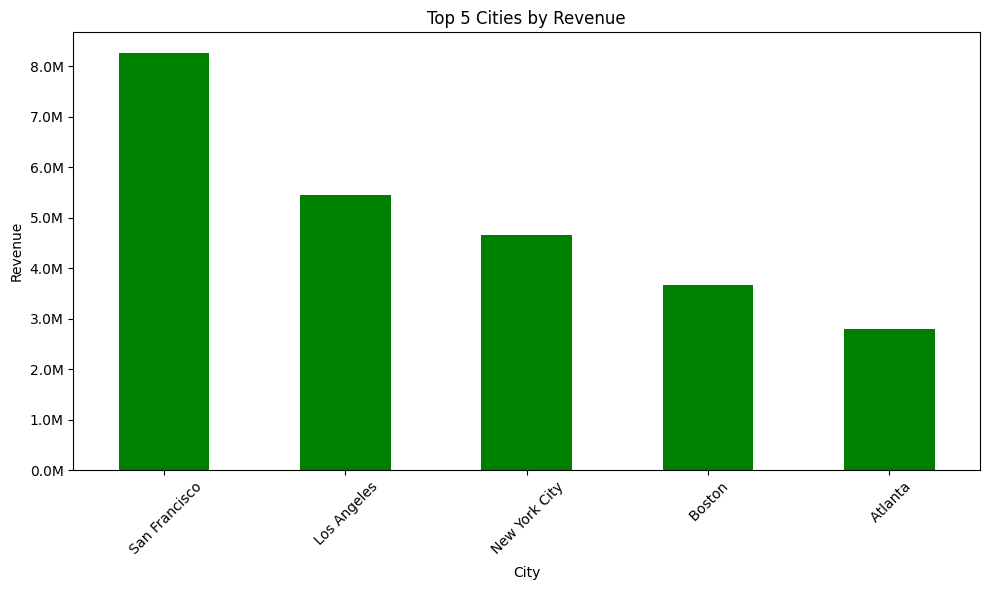

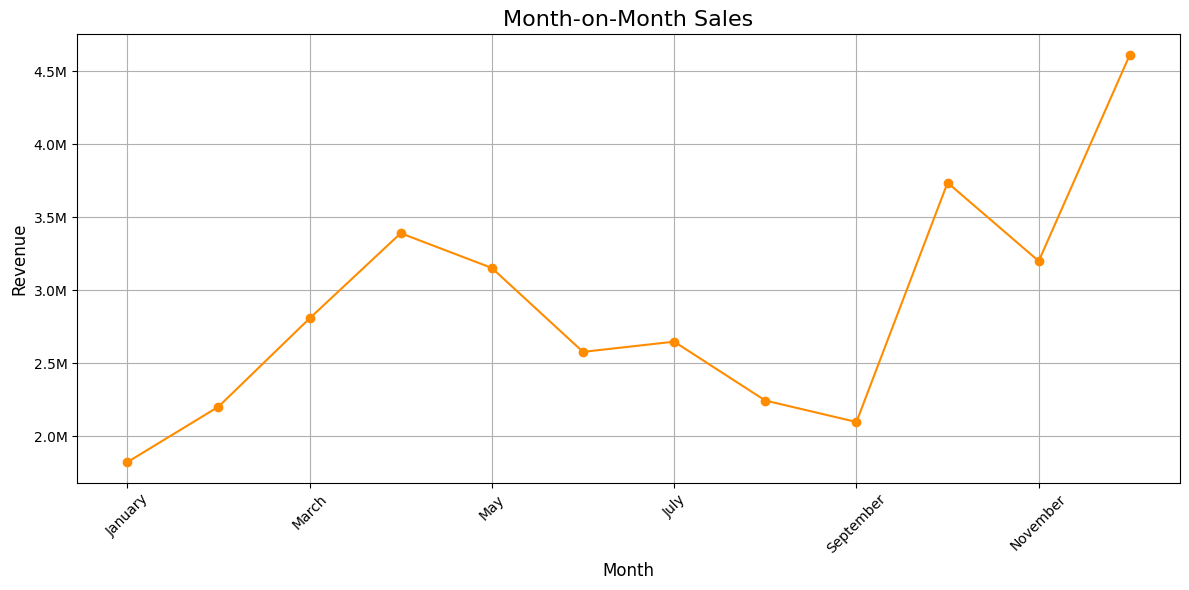

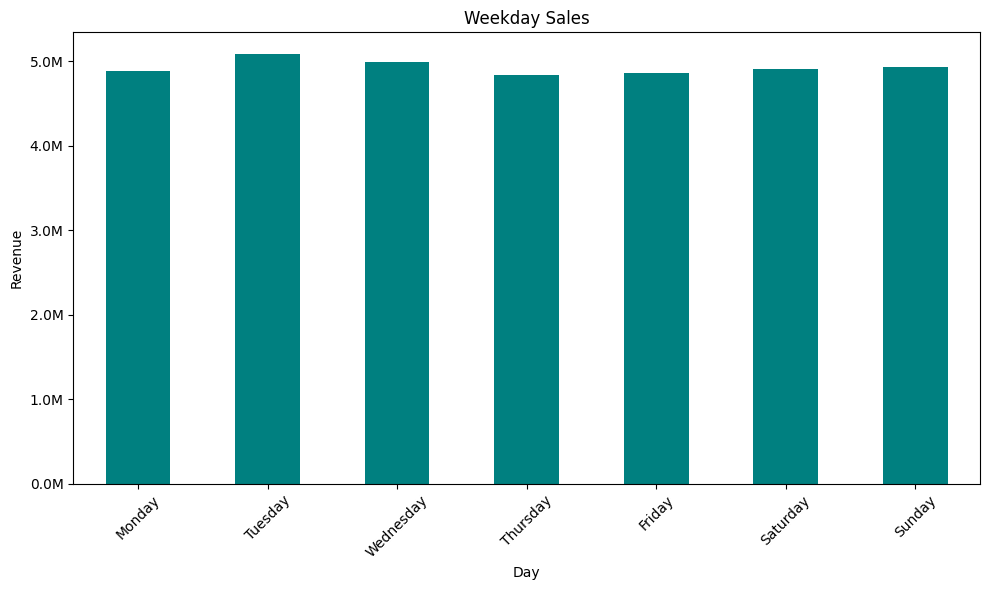

In [93]:
# Top 5 Best-selling Products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='slateblue')
plt.title("Top 5 High Revenue Products")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig("best_products.png")
plt.show()
#top ordered products-high demand
plt.figure(figsize=(10, 6))
top_ordered_products.plot(kind='bar', color='skyblue')
plt.title("Top 5 Highly Ordered Products")
plt.ylabel("Ordered Quantity")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("high_demand_products.png")
plt.show()

# 5 Lowest-selling Products
plt.figure(figsize=(10, 6))
low_products.plot(kind='bar', color='red')
plt.title("5 Lowest-revenue Products")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig("last_products.png")
plt.show()

# Top 5 Cities by Revenue
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='green')
plt.title("Top 5 Cities by Revenue")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig("best_cities.png")
plt.show()

# Month-on-Month Sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='darkorange')
plt.title("Month-on-Month Sales", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.grid(True)
plt.savefig("best_months.png")
plt.show()

# Weekday Sales
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='teal')
plt.title("Weekday Sales")
plt.ylabel("Revenue")
plt.xlabel("Day")
plt.xticks(rotation=45)
formatter = ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig("weekeday_sales.png")
plt.show()
